# Titanic Kaggle Data


Sources from:
* https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner
* https://www.kaggle.com/saisivasriram/titanic-feature-understanding-from-plots
* https://www.kaggle.com/athabascaai/titanic-passenger-graphs-for-feature-inspection#Looking-into-the-data-from-the-Titanic-Disaster-data-set
* https://medium.com/@praveen.orvakanti/this-will-help-you-score-95-percentile-in-the-kaggle-titanic-ml-competition-aa2b3fd1b79b
* https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
* https://towardsdatascience.com/kaggle-titanic-machine-learning-model-top-7-fa4523b7c40
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://pbpython.com/categorical-encoding.html _guide to categorical encoding_
* https://www.practicaldatascience.org/html/index.html



## Contents
1. [Import Data](#ch1)
2. [Data Exploration](#ch2)
3. [Data Cleansing](#ch3)
  * 3.1 [Imputing Data](#ch3.1)
  * 3.2 [Feature Engineering](#ch3.2)
4. [Data Modelling](#ch4)

<a id="ch1"></a>
## 1. Import Data

In [1]:
#import modules needed for analysis
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#List files in the data folder
import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\gender_submission.csv
./input\test.csv
./input\train.csv


In [2]:
#Load the training data and print the first 5 rows.
train_data = pd.read_csv('./input/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Load the testing data and print the first 5 rows.
test_data = pd.read_csv('./input/test.csv')
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Preliminary stats on the training data.
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="ch2"></a>
## Data Exploration

In [5]:
#To explore the data, append the test and train data together. This will allow us to impute features and do data anlysis on the whole data set.
titanic =  train_data.append(test_data, ignore_index = True, sort = True)
titanic.describe()


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


In [7]:
#Percentage of survival by Gender
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

#Format as %
print("% of women who survived: " + "{:.2%}".format(rate_women))
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived: " + "{:.2%}".format(rate_men))

% of women who survived: 74.20%
% of men who survived: 18.89%


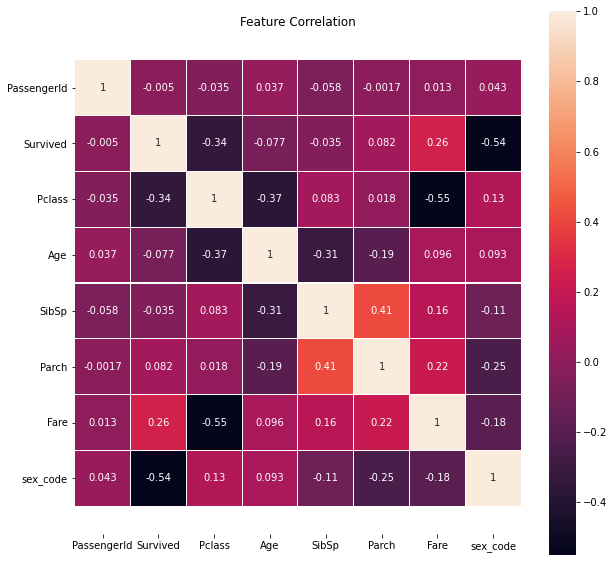

In [8]:
#Categorical factors for plotting
factors_plot = ['Age','Survived','Pclass','SibSp','Parch','sex_code']

#Establish Sex as a Categorical field for plotting
sex_cat = pd.Categorical(train_data['Sex'])
train_data['sex_code'] = sex_cat.codes+1

#Set Correlation
corr = train_data.corr()

#Plot the correlation with a heatmap.
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True, square = True, linewidths=0.01)
plt.title('Feature Correlation');

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

#Append the Sex_Code to the full data set
sex_cat = pd.Categorical(titanic['Sex'])
titanic['sex_code'] = sex_cat.codes+1

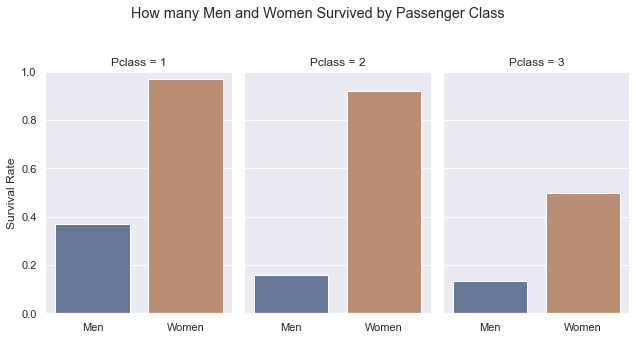

In [9]:
#Plot the Passenger Class and Survival by Sex.
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=train_data, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set(ylim=(0, 1))
    .despine(left=True))

plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');


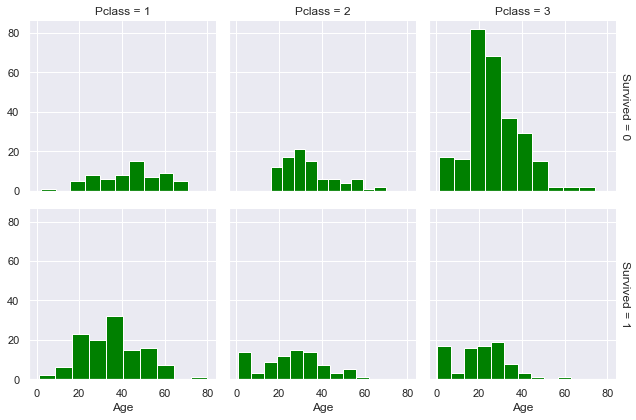

In [10]:
#Survival by Ticket Class and Age
g = sns.FacetGrid(train_data, col="Pclass", row="Survived", margin_titles=True)
g.map(plt.hist, "Age", color="green");


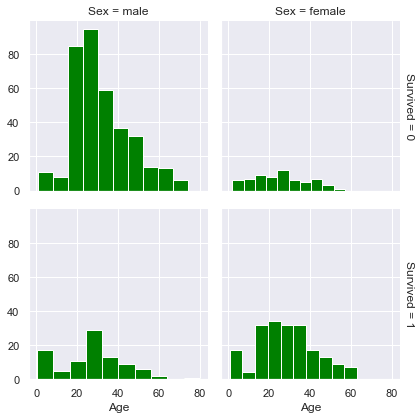

In [11]:
#Survival by Ticket Class and Sex
g = sns.FacetGrid(train_data, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age", color="green");


In [12]:
#What are the unique deck types based on the first letter of the cabin.
print(train_data['Cabin'].str[0].unique())
#Set the column Deck as the first letter of the cabin.
train_data["Deck"] = train_data['Cabin'].str[0]
#Establish the Deck field as a category.
train_data["Deck"] = train_data["Deck"].astype('category')

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


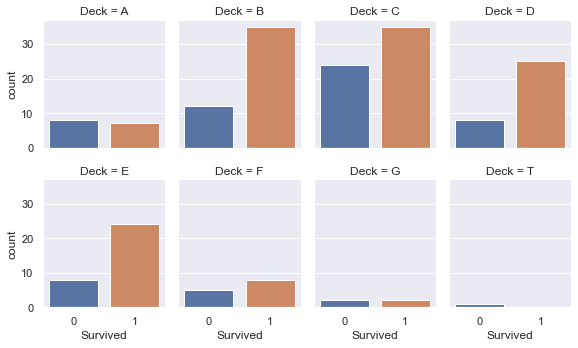

In [13]:
#Plot Survival by Deck
sns.catplot("Survived", col="Deck", col_wrap=4,
                    data=train_data[train_data.Deck.notnull()],
                    kind="count", height=2.5, aspect=.8);

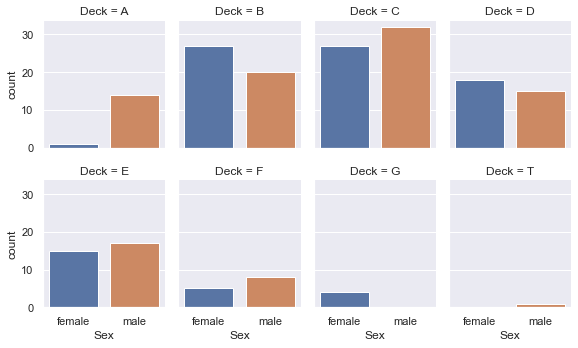

In [14]:
#Plot Sex by Deck
sns.catplot("Sex", col="Deck", col_wrap=4,
                    data=train_data[train_data.Deck.notnull()],
                    kind="count", height=2.5, aspect=.8);

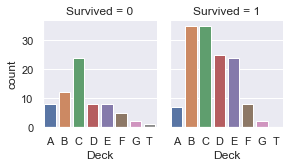

In [15]:
#Overall Survival by Deck
sns.catplot("Deck", col="Survived",
                    data=train_data[train_data.Deck.notnull()],
                    kind="count", height=2.5, aspect=.8);

<a id="ch3"></a>
## 3. Data Cleansing

In [16]:
#Find Null Values and store null columns into a variable
null_columns=titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()
#Survived is not in the test data set, therefore nulls exists

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
sex_code          0
dtype: int64

<a id="ch3.1"></a>
### 3.1 Imputing missing data

In [17]:
titanic[titanic['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,sex_code
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,1
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,1


These two passengers both were on Deck B, with the same fare cost and class, it's likely they were coming from the same place

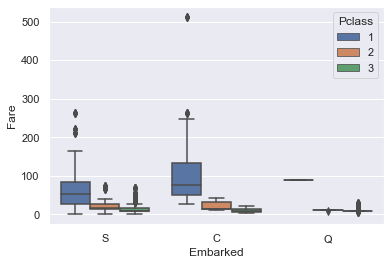

In [18]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic);

In [19]:
#np.median(titanic[titanic.Pcclass]==1)
#Median Fare for First Class, Embarking from Cherbourg
titanic[(titanic.Pclass == 1) & (titanic.Embarked == 'C')]["Fare"].median()
#Grouped median and mean
grouped_median = titanic.groupby(['Embarked','Pclass'])[['Fare']].apply(np.median)
print(grouped_median)
grouped_mean = titanic.groupby(['Embarked','Pclass'])[['Fare']].apply(np.mean)
print(grouped_mean)

Embarked  Pclass
C         1         76.7292
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3             NaN
dtype: float64
                       Fare
Embarked Pclass            
C        1       106.845330
         2        23.300593
         3        11.021624
Q        1        90.000000
         2        11.735114
         3        10.390820
S        1        72.148094
         2        21.206921
         3        14.435422


In [20]:
#Fill in the missing fare classes with 'C'

titanic["Embarked"] = titanic["Embarked"].fillna('C')
print(titanic["Embarked"].describe())

print("\n There are ",titanic["Embarked"].isna().sum(),"null records")


count     1309
unique       3
top          S
freq       914
Name: Embarked, dtype: object

 There are  0 null records


In [21]:
#Null Fare Records
titanic["Fare"].isna().sum()

1

In [22]:
titanic[titanic['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,sex_code
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,2


In [23]:
#Fill in the missing Fares
#fills fares, based on ticket class, and embarkation location

def fill_missing_fare(df, pclass, embarkation):
    median_fare=df[(df['Pclass'] == pclass) & (df['Embarked'] == embarkation)]['Fare'].median()

    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

titanic=fill_missing_fare(titanic, 3, 'S')

#Verify the known fare has been filled
print(titanic.loc[1043])

Age                          60.5
Cabin                         NaN
Embarked                        S
Fare                         8.05
Name           Storey, Mr. Thomas
Parch                           0
PassengerId                  1044
Pclass                          3
Sex                          male
SibSp                           0
Survived                      NaN
Ticket                       3701
sex_code                        2
Name: 1043, dtype: object


**Imputing Missing Age Data**


(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

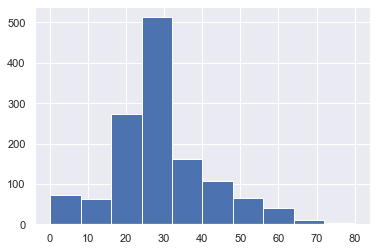

In [24]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)

plt.hist(titanic['Age'])

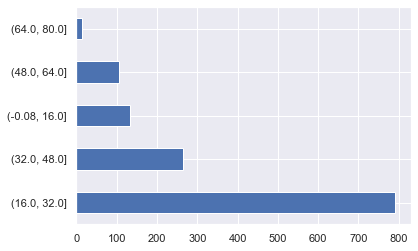

In [25]:
#Bucket age into discrete bins
titanic['AgeBin'] = pd.cut(titanic['Age'].astype(int), 5)

ax = titanic['AgeBin'].value_counts().plot(kind='barh')

<a id="ch3.2"></a>
### 3.2 Feature Engineering
**Family Size**


In [26]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]+1
print(titanic["FamilySize"].value_counts())

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64


In [27]:
#Make discrete family sizes
titanic.loc[titanic["FamilySize"] == 1, "FsizeD"] = 'solo'
titanic.loc[(titanic["FamilySize"]>1) & (titanic["FamilySize"] < 5 ), "FsizeD"] = 'small'
titanic.loc[titanic["FamilySize"]>4, "FsizeD"] = 'large'

print(titanic["FsizeD"].unique())
print(titanic["FsizeD"].value_counts())

['small' 'solo' 'large']
solo     790
small    437
large     82
Name: FsizeD, dtype: int64


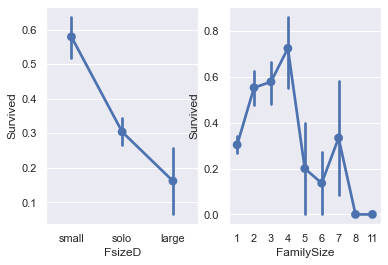

In [28]:
fig, saxis = plt.subplots(1, 2)

sns.pointplot(kind = 'point', x = "FsizeD", y = "Survived", data = titanic[titanic.Survived.notnull()], ax = saxis[0])
sns.pointplot(kind = 'point', x = 'FamilySize',  y= 'Survived', data = titanic[titanic.Survived.notnull()], ax = saxis[1])

**Getting Person's Title**

In [29]:
#get regex
import re

#define the formula
def get_title(name):
    #title search is the regex search of a space, any capital or lowercase letter, as many times as needed, and ending with a period
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #if a title exists, extract and return it
    if title_search:
        return title_search.group(1)
    return ""

titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))
#Set titles column
titanic["Title"] = titles

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Countess      1
Lady          1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Don           1
Dona          1
Name: Name, dtype: int64


In [30]:
#Establish Rare Titles
rare_titles = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
#Add a new column Title2 where the persons title is a rare title
titanic.loc[titanic["Title"].isin(rare_titles), "Title2"] = 'Rare Title'

women_titles = ['Mlle', 'Ms', 'Mme', 'Dona']
#fill Title2 with overwritten women's titles
titanic.loc[titanic["Title"].isin(women_titles), "Title2"] = 'Miss'

#fill in the leftovers with the original titles
titanic["Title2"] = titanic["Title2"].fillna(titanic["Title"])
#Records by Title
print(titanic["Title2"].value_counts())
#Total Titanic Records
print(len(titanic))

Mr            757
Miss          266
Mrs           197
Master         61
Rare Title     28
Name: Title2, dtype: int64
1309


Ensure all new encoded variables are in the full data set, then
Re-subset the training data, (to include survivability) and remap correlation matrix with new variables


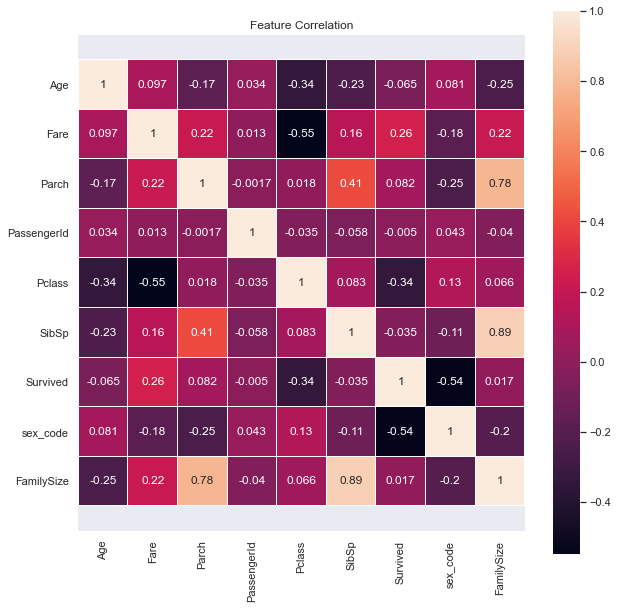

In [31]:
#factors_plot = ['Age','Survived','Pclass','SibSp','Parch','sex_code','Title2','Deck','FsizeD']
titanic['Cabin'].str[0].unique()
titanic["Deck"] = titanic['Cabin'].str[0]
titanic["Deck"] = titanic["Deck"].astype('category')

#Establish Sex as a Categorical field for plotting
train_data = titanic[titanic.Survived.notnull()]


#Set Correlation
corr = train_data.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot = True, square = True, linewidths=0.01)
plt.title('Feature Correlation');

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!


In [32]:
train_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,sex_code,AgeBin,FamilySize,FsizeD,Title,Title2,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,"(16.0, 32.0]",2,small,Mr,Mr,NaN
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,"(32.0, 48.0]",2,small,Mrs,Mrs,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,"(16.0, 32.0]",1,solo,Miss,Miss,NaN
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,"(32.0, 48.0]",2,small,Mrs,Mrs,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,"(32.0, 48.0]",1,solo,Mr,Mr,NaN


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1309 non-null   float64 
 1   Cabin        295 non-null    object  
 2   Embarked     1309 non-null   object  
 3   Fare         1309 non-null   float64 
 4   Name         1309 non-null   object  
 5   Parch        1309 non-null   int64   
 6   PassengerId  1309 non-null   int64   
 7   Pclass       1309 non-null   int64   
 8   Sex          1309 non-null   object  
 9   SibSp        1309 non-null   int64   
 10  Survived     891 non-null    float64 
 11  Ticket       1309 non-null   object  
 12  sex_code     1309 non-null   int8    
 13  AgeBin       1309 non-null   category
 14  FamilySize   1309 non-null   int64   
 15  FsizeD       1309 non-null   object  
 16  Title        1309 non-null   object  
 17  Title2       1309 non-null   object  
 18  Deck         295 non-null   

<a id="ch4"></a>
## 4. Data Modelling

**Feature Scaling**


In [34]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(titanic[['Age', 'Fare']])
titanic[['Age', 'Fare']] = std_scale.transform(titanic[['Age', 'Fare']])

std_scale = preprocessing.StandardScaler().fit(test_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = std_scale.transform(test_data[['Age', 'Fare']])

In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

lab_encoder = LabelEncoder()

cols = ['Embarked','Title','FsizeD','AgeBin']
newcols = ['Embarked_Code','Title_Code','FsizeD_Code','AgeBin_Code']

for col, ncols  in zip(cols, newcols):
        titanic[ncols] = lab_encoder.fit_transform(titanic[col])

In [36]:
#Outcome selected        
target = ['Survived']

#Variables uncoded
vars_uncoded = ['Sex','Embarked','Title','FsizeD','Pclass','AgeBin']

#Variables Coded
vars_coded = ['sex_code','Embarked_Code','Title_Code','FsizeD_Code','Pclass','AgeBin_Code']

In [37]:
titanic.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'sex_code', 'AgeBin',
       'FamilySize', 'FsizeD', 'Title', 'Title2', 'Deck', 'Embarked_Code',
       'Title_Code', 'FsizeD_Code', 'AgeBin_Code'],
      dtype='object')

In [38]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,AgeBin,FamilySize,FsizeD,Title,Title2,Deck,Embarked_Code,Title_Code,FsizeD_Code,AgeBin_Code
0,-0.581628,NaN,S,-0.503176,"Braund, Mr. Owen Harris",0,1,3,male,1,...,"(16.0, 32.0]",2,small,Mr,Mr,NaN,2,13,1,1
1,0.658652,C85,C,0.734809,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,"(32.0, 48.0]",2,small,Mrs,Mrs,C,0,14,1,2
2,-0.271558,NaN,S,-0.490126,"Heikkinen, Miss. Laina",0,3,3,female,0,...,"(16.0, 32.0]",1,solo,Miss,Miss,NaN,2,10,2,1
3,0.426099,C123,S,0.383263,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,"(32.0, 48.0]",2,small,Mrs,Mrs,C,2,14,1,2
4,0.426099,NaN,S,-0.487709,"Allen, Mr. William Henry",0,5,3,male,0,...,"(32.0, 48.0]",1,solo,Mr,Mr,NaN,2,13,2,2


### Random Forest Classifier

In [39]:
#Begin testing with a Random Forest
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]


#Test with reduced features in original format
features = ["Pclass","Sex","SibSp","Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X,y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

In [40]:
output.head(10)

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
5,897,0.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0


In [41]:
#Split encoded data into test & train data sets.
train_dat = titanic[titanic.Survived.notnull()]
test_dat = titanic[titanic.Survived.isnull()]

In [42]:
#Set new training random forest with coded variables of new data set.
y = train_dat['Survived']
X = pd.get_dummies(train_dat[vars_coded])
X_test = pd.get_dummies(test_dat[vars_coded])

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X,y)
predictions = model.predict(X_test)

In [52]:
#Create new gender submission DF
gender_submission = pd.DataFrame({'PassengerId': test_dat.PassengerId, 'Survived': predictions.astype(int)})
gender_submission.head(10)

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


In [53]:
#Save Gender Submission
save_file = './output/gender_submission.csv'
gender_submission.to_csv(save_file, sep = ',',index=False)
gender_submission.shape

(418, 2)